In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
missing_values = df.isnull().sum()


In [5]:
print("Basic Information:")
print(df.info())
print("\nMissing Values:")
print(missing_values)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None

Missing Values:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [6]:
print("\nFirst Few Rows of the DataFrame:")
print(df.head())


First Few Rows of the DataFrame:
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


In [7]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  


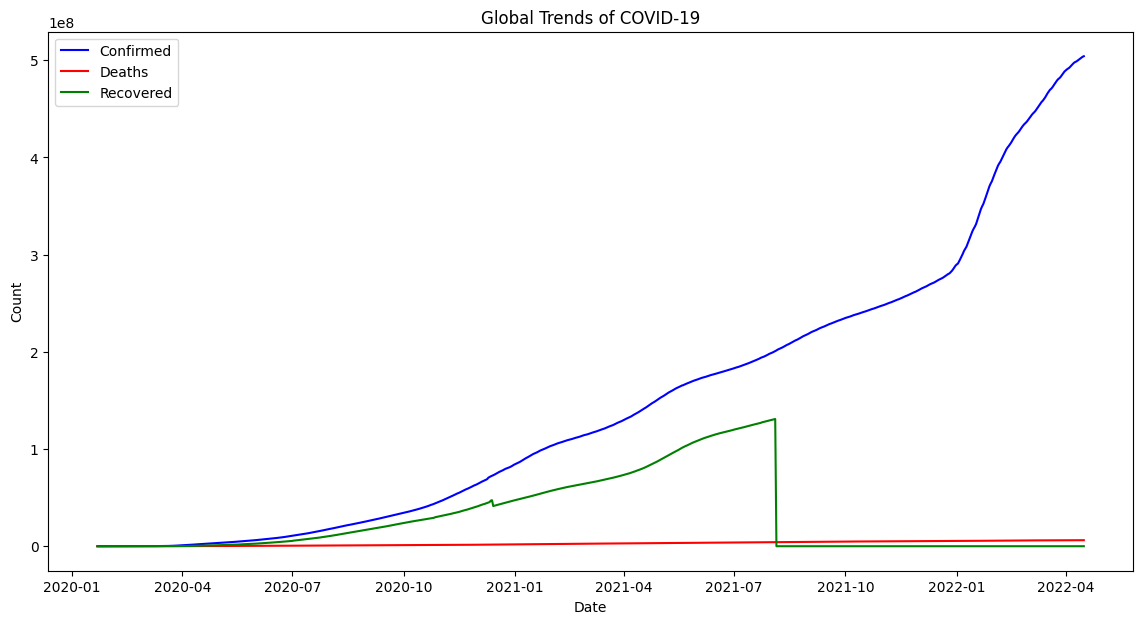

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.plot(df.groupby('Date')['Deaths'].sum(), label='Deaths', color='red')
plt.plot(df.groupby('Date')['Recovered'].sum(), label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Trends of COVID-19')
plt.legend()
plt.show()


In [9]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(14, 7))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed', color='blue')
    plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths', color='red')
    plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered', color='green')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

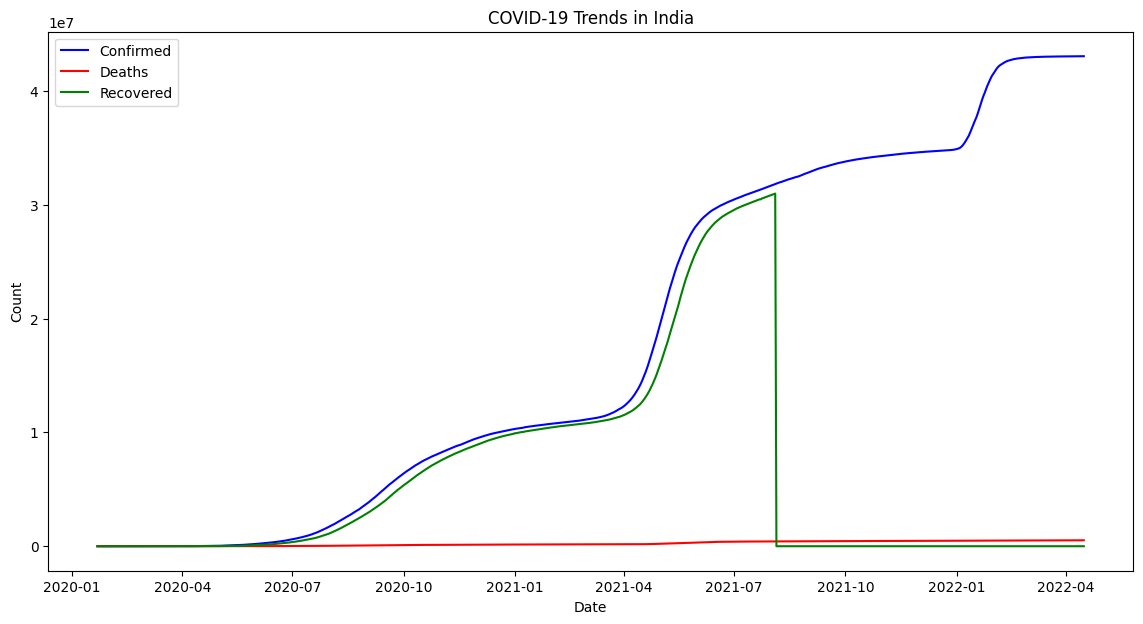

In [10]:
plot_country_trends('India')


In [11]:
def compare_countries(countries):
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} Confirmed')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title('Comparison of COVID-19 Trends in Multiple Countries')
    plt.legend()
    plt.show()


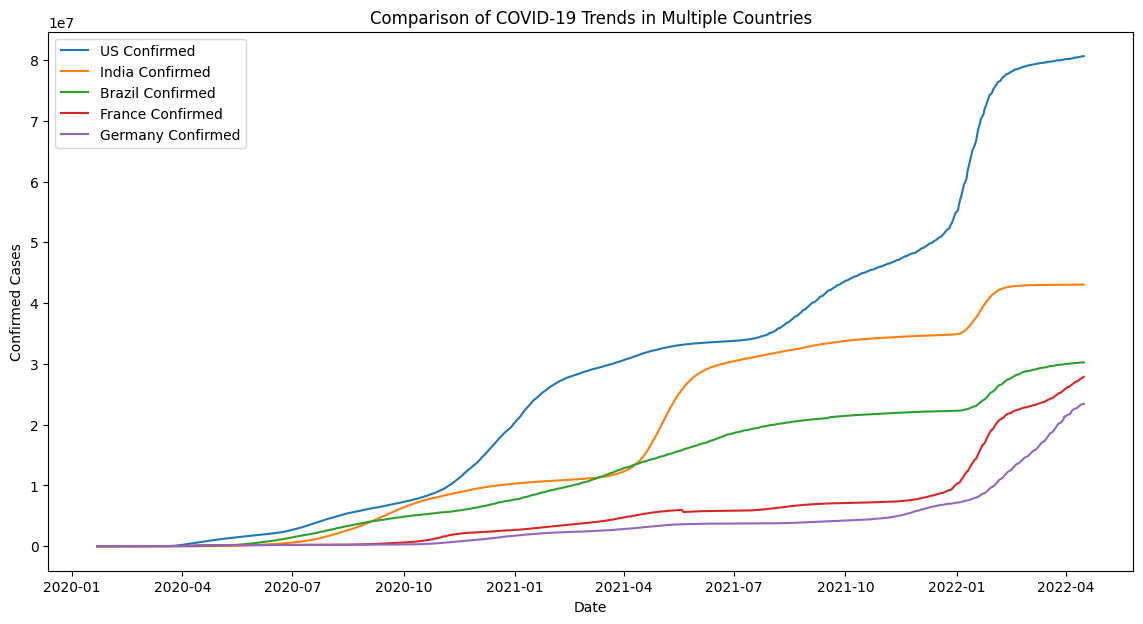

In [12]:
top_5_countries = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(5).index
compare_countries(top_5_countries)

In [13]:
top_countries = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10).index
top_countries_data = df[df['Country'].isin(top_countries)]


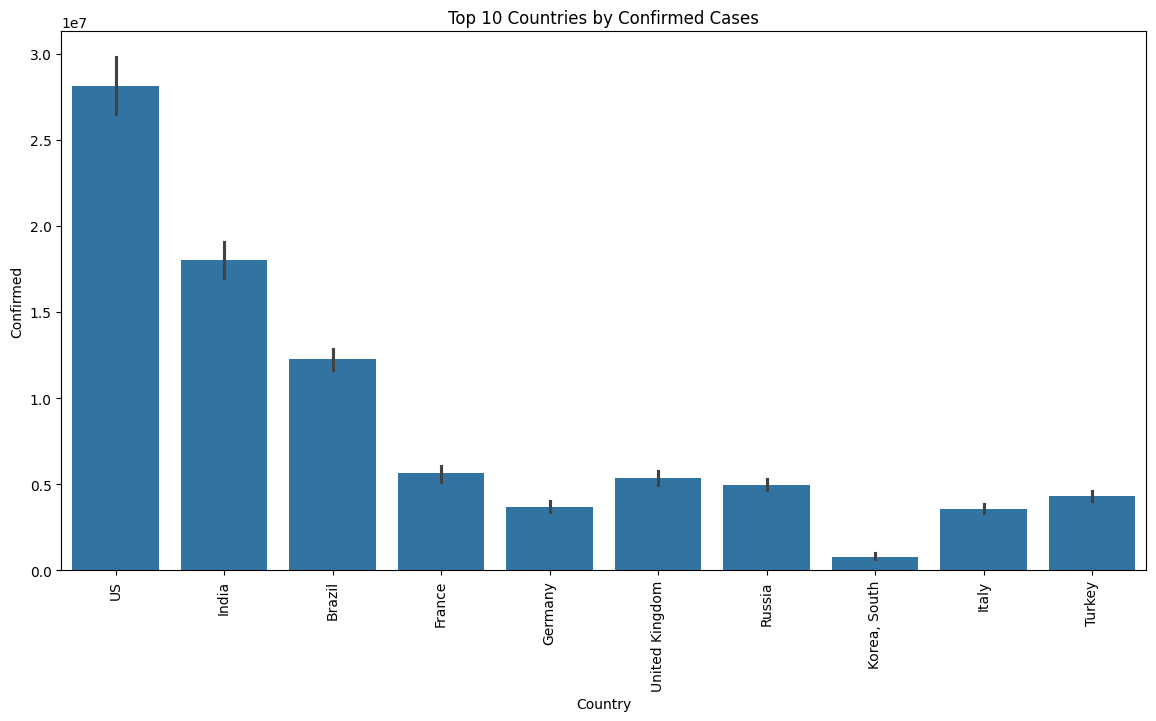

In [14]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_countries_data, x='Country', y='Confirmed', order=top_countries)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xticks(rotation=90)
plt.show()


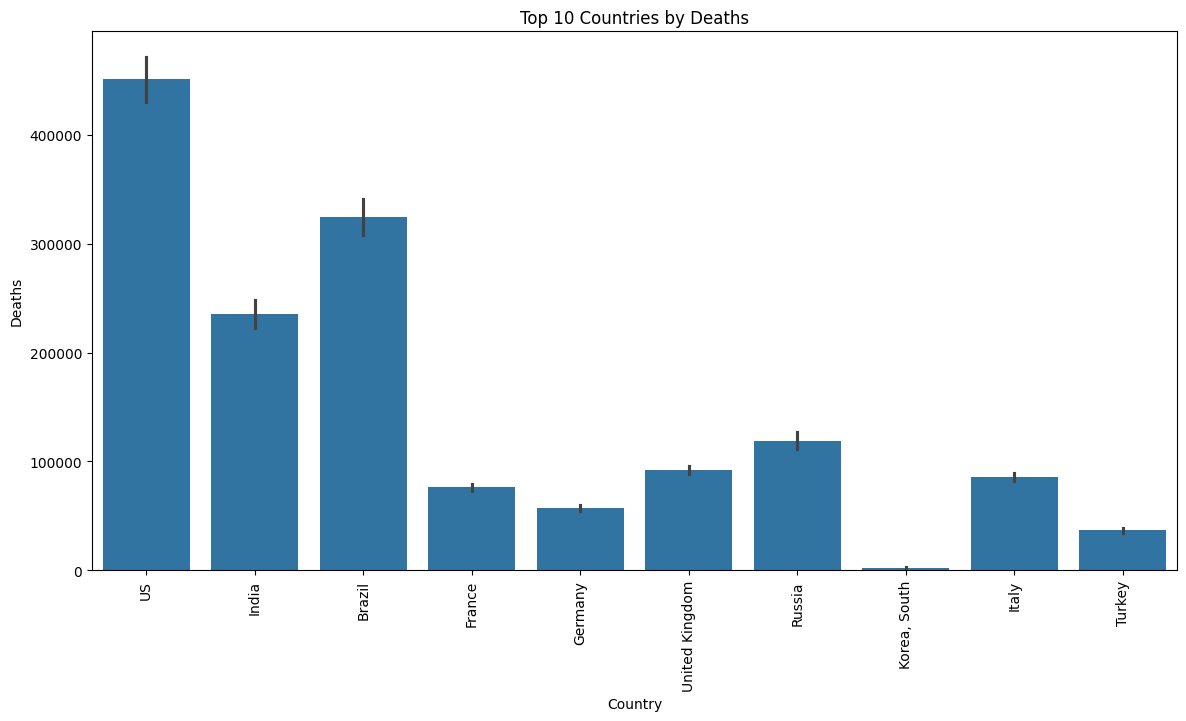

In [15]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_countries_data, x='Country', y='Deaths', order=top_countries)
plt.title('Top 10 Countries by Deaths')
plt.xticks(rotation=90)
plt.show()


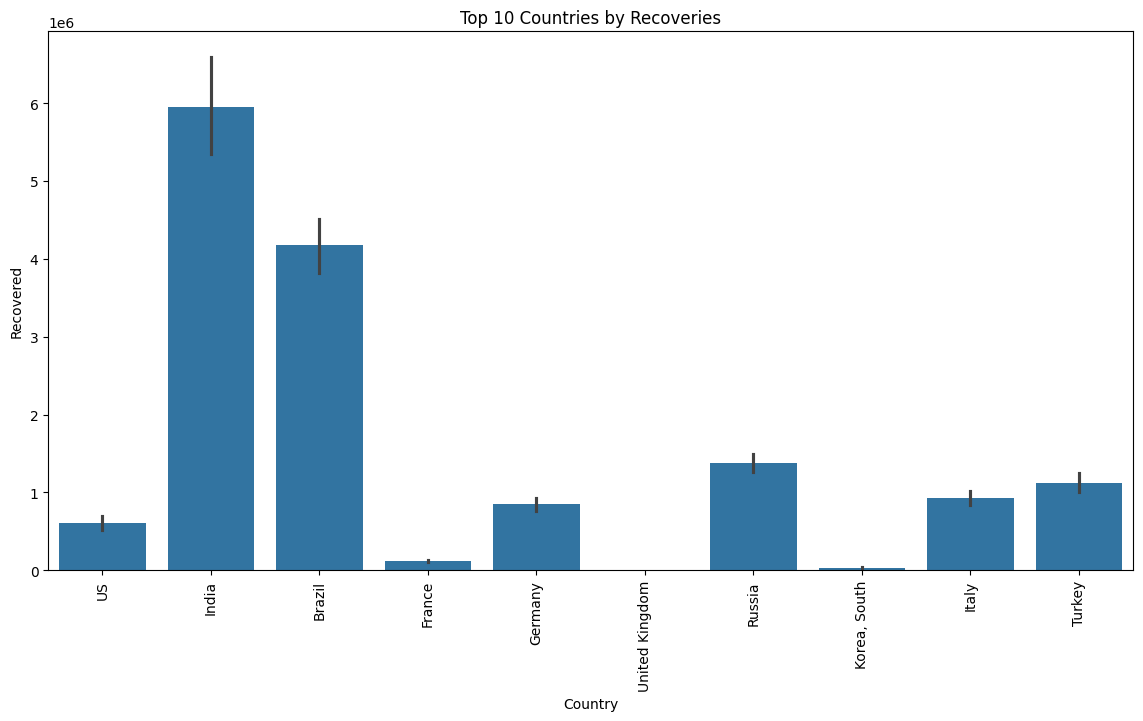

In [16]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_countries_data, x='Country', y='Recovered', order=top_countries)
plt.title('Top 10 Countries by Recoveries')
plt.xticks(rotation=90)
plt.show()

In [17]:
df['Confirmed_MA'] = df['Confirmed'].rolling(window=7).mean()
df['Deaths_MA'] = df['Deaths'].rolling(window=7).mean()
df['Recovered_MA'] = df['Recovered'].rolling(window=7).mean()


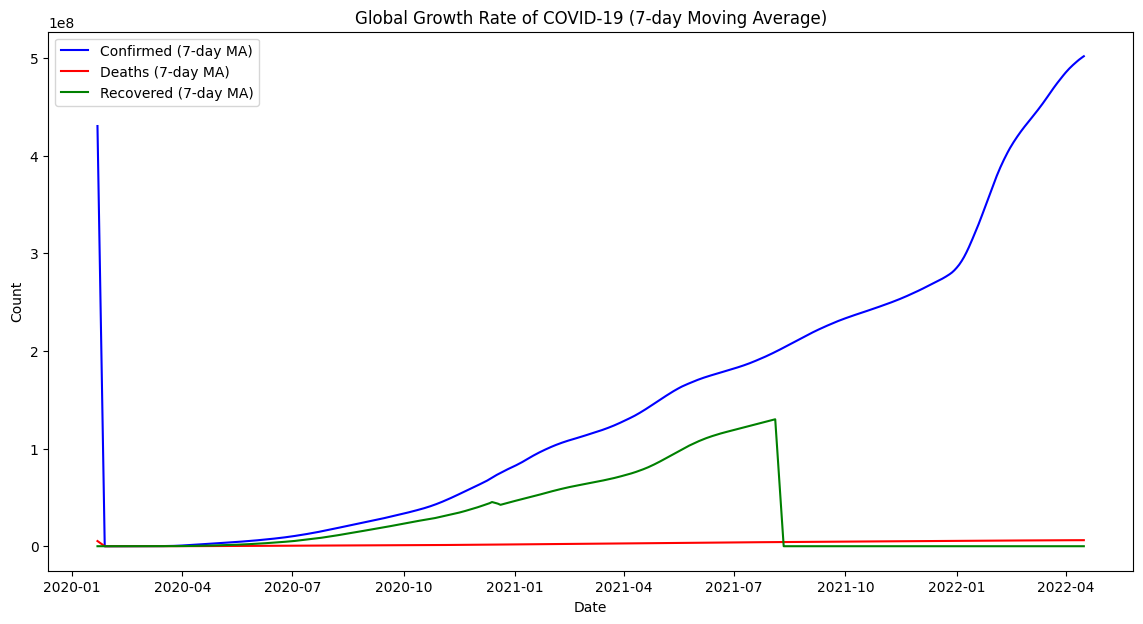

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Confirmed_MA'].sum(), label='Confirmed (7-day MA)', color='blue')
plt.plot(df.groupby('Date')['Deaths_MA'].sum(), label='Deaths (7-day MA)', color='red')
plt.plot(df.groupby('Date')['Recovered_MA'].sum(), label='Recovered (7-day MA)', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Growth Rate of COVID-19 (7-day Moving Average)')
plt.legend()
plt.show()

In [19]:
global_data = df.groupby('Date').sum().select_dtypes(include='number')
correlation_matrix = global_data.corr()

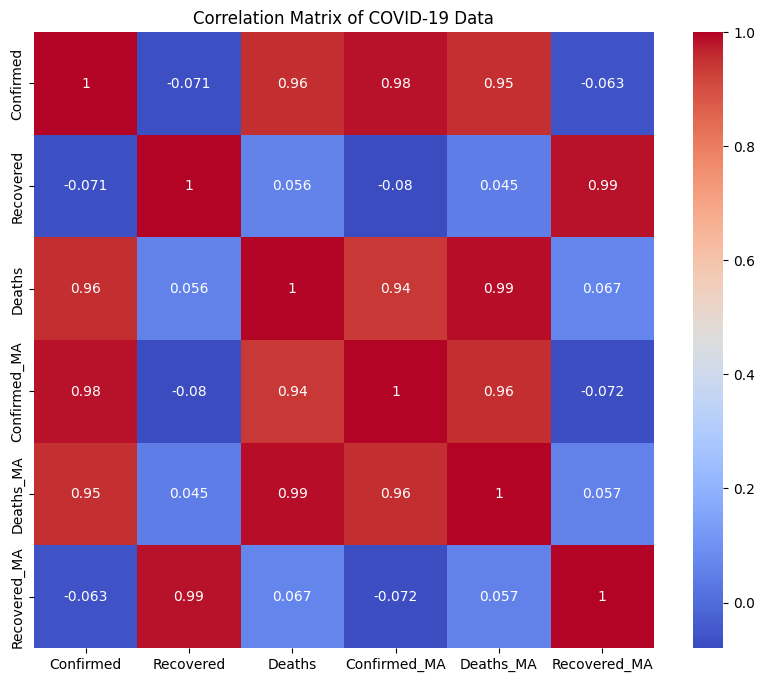

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()

In [21]:
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]
max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
max_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
max_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

print(f"Country with the highest number of confirmed cases as of {latest_date}: {max_confirmed['Country']} ({max_confirmed['Confirmed']})")
print(f"Country with the highest number of deaths as of {latest_date}: {max_deaths['Country']} ({max_deaths['Deaths']})")
print(f"Country with the highest number of recoveries as of {latest_date}: {max_recovered['Country']} ({max_recovered['Recovered']})")


Country with the highest number of confirmed cases as of 2022-04-16 00:00:00: US (80625120)
Country with the highest number of deaths as of 2022-04-16 00:00:00: US (988609)
Country with the highest number of recoveries as of 2022-04-16 00:00:00: Afghanistan (0)


In [22]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Togo', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'UAE', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

In [23]:
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}


In [24]:
df['Continent'] = df['Country'].map(country_to_continent)


In [25]:
print("\nFirst Few Rows of the DataFrame with Continent:")
print(df.head())


First Few Rows of the DataFrame with Continent:
        Date      Country  Confirmed  Recovered  Deaths  Confirmed_MA  \
0 2020-01-22  Afghanistan          0          0       0           NaN   
1 2020-01-23  Afghanistan          0          0       0           NaN   
2 2020-01-24  Afghanistan          0          0       0           NaN   
3 2020-01-25  Afghanistan          0          0       0           NaN   
4 2020-01-26  Afghanistan          0          0       0           NaN   

   Deaths_MA  Recovered_MA Continent  
0        NaN           NaN      Asia  
1        NaN           NaN      Asia  
2        NaN           NaN      Asia  
3        NaN           NaN      Asia  
4        NaN           NaN      Asia  


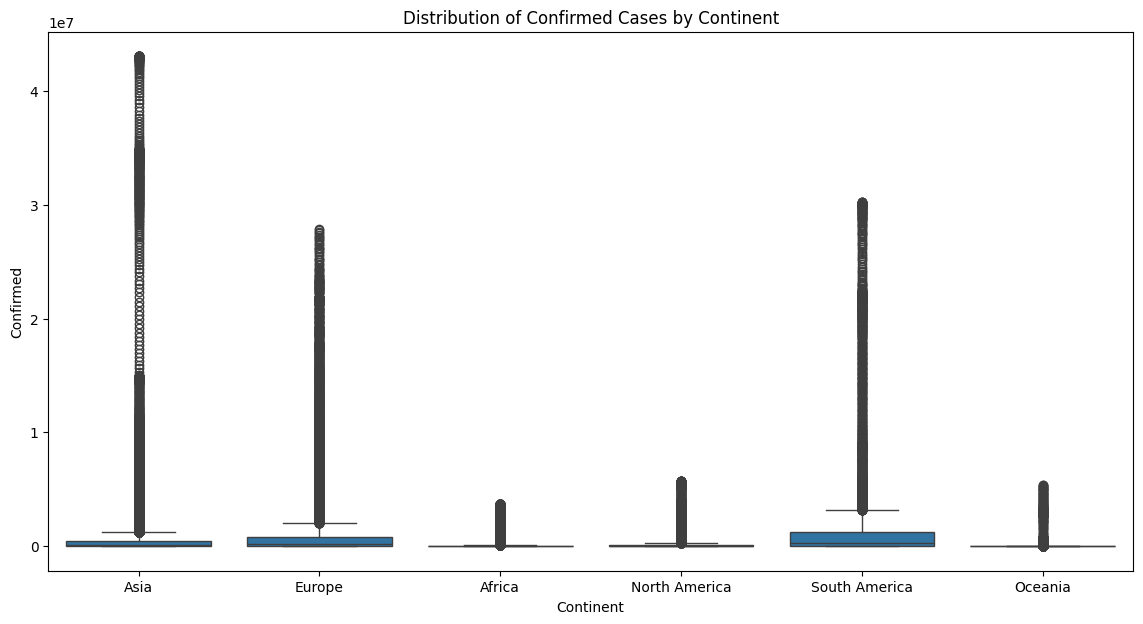

In [26]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Confirmed')
plt.title('Distribution of Confirmed Cases by Continent')
plt.show()

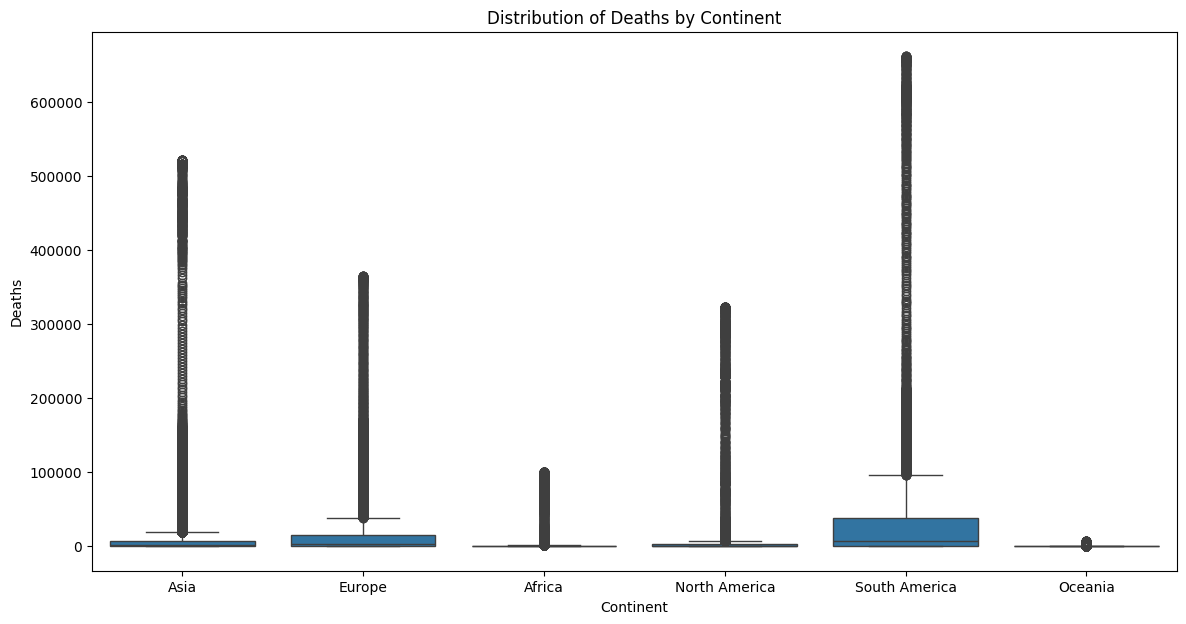

In [27]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Deaths')
plt.title('Distribution of Deaths by Continent')
plt.show()

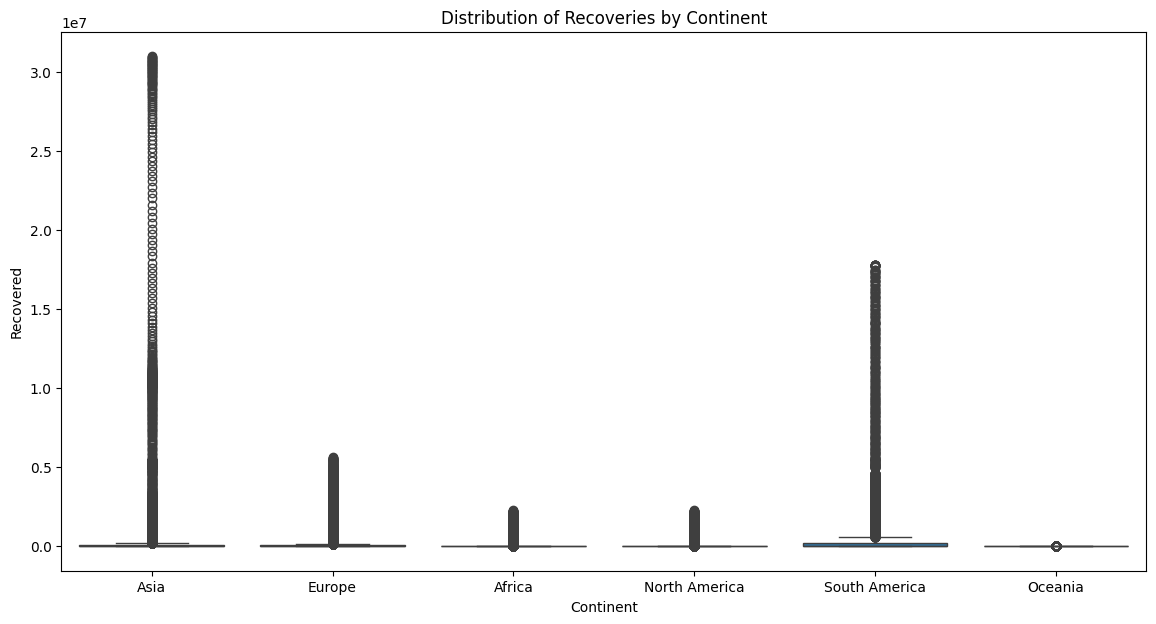

In [28]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Recovered')
plt.title('Distribution of Recoveries by Continent')
plt.show()

## **answers** Part 2

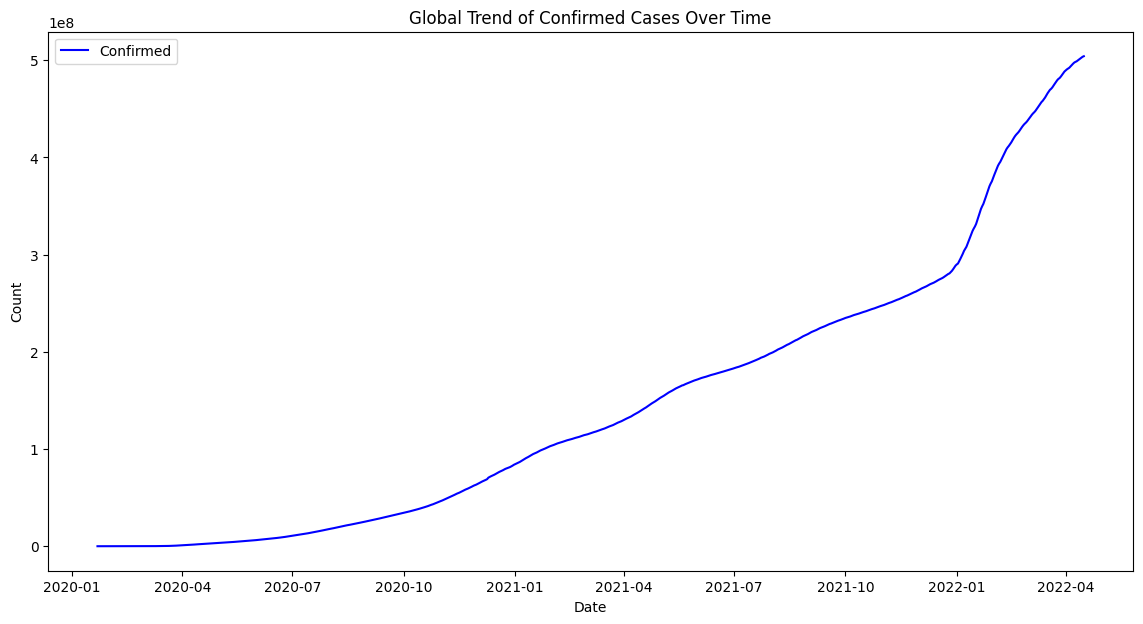

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Trend of Confirmed Cases Over Time')
plt.legend()
plt.show()

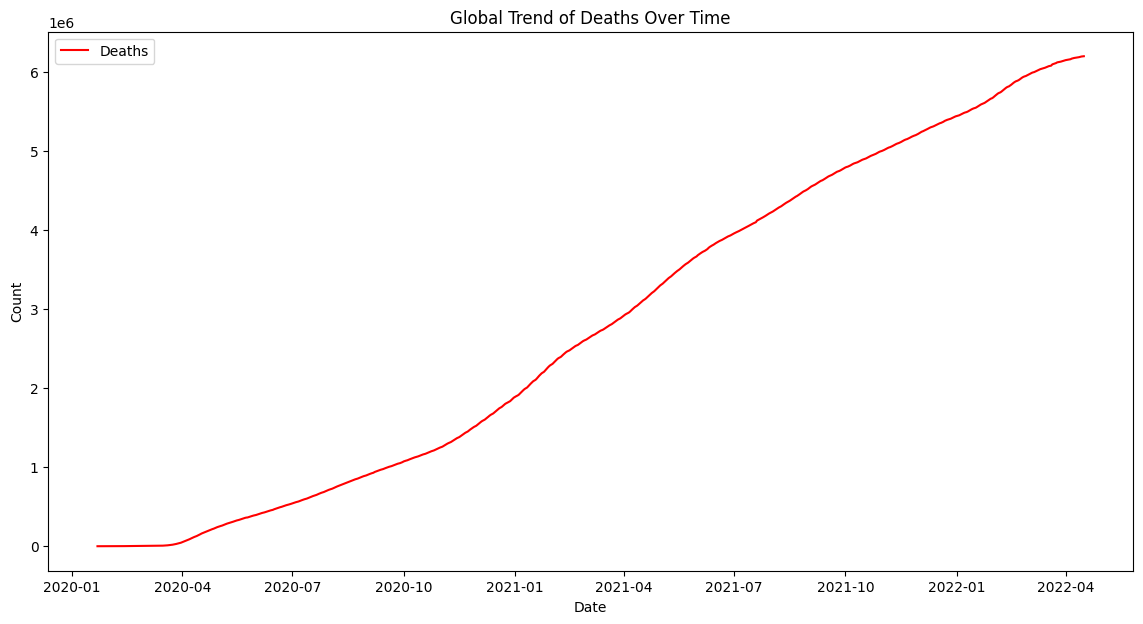

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Deaths'].sum(), label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Trend of Deaths Over Time')
plt.legend()
plt.show()

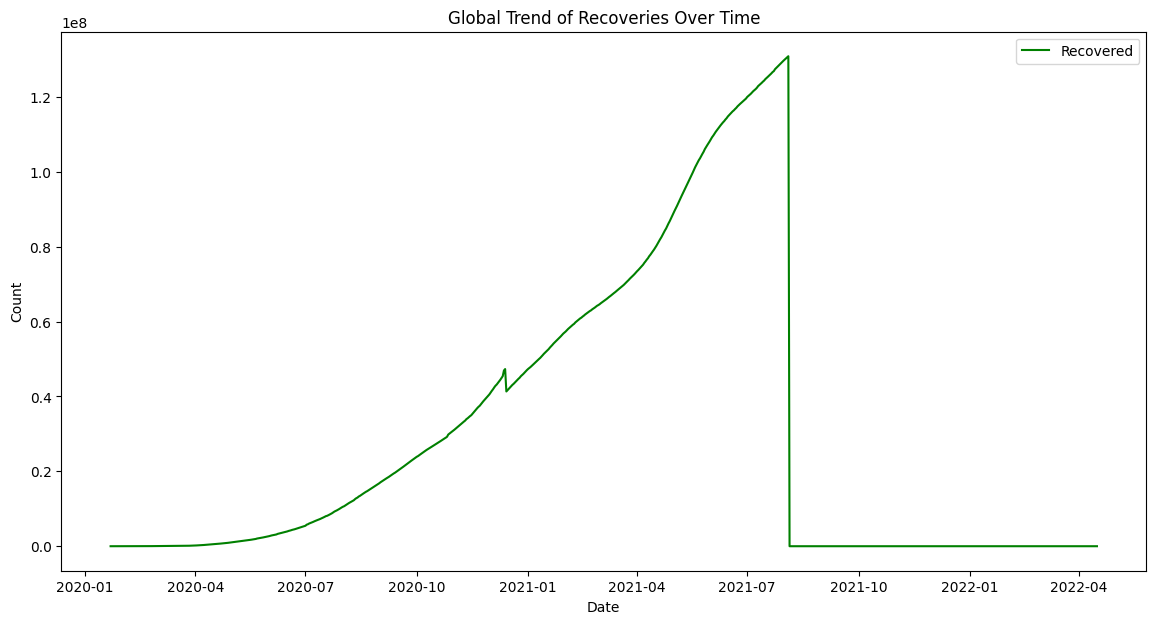

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Recovered'].sum(), label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Trend of Recoveries Over Time')
plt.legend()
plt.show()

In [32]:
print(f"Country with the highest number of confirmed cases as of {latest_date}: {max_confirmed['Country']} ({max_confirmed['Confirmed']})")
print(f"Country with the highest number of deaths as of {latest_date}: {max_deaths['Country']} ({max_deaths['Deaths']})")
print(f"Country with the highest number of recoveries as of {latest_date}: {max_recovered['Country']} ({max_recovered['Recovered']})")


Country with the highest number of confirmed cases as of 2022-04-16 00:00:00: US (80625120)
Country with the highest number of deaths as of 2022-04-16 00:00:00: US (988609)
Country with the highest number of recoveries as of 2022-04-16 00:00:00: Afghanistan (0)


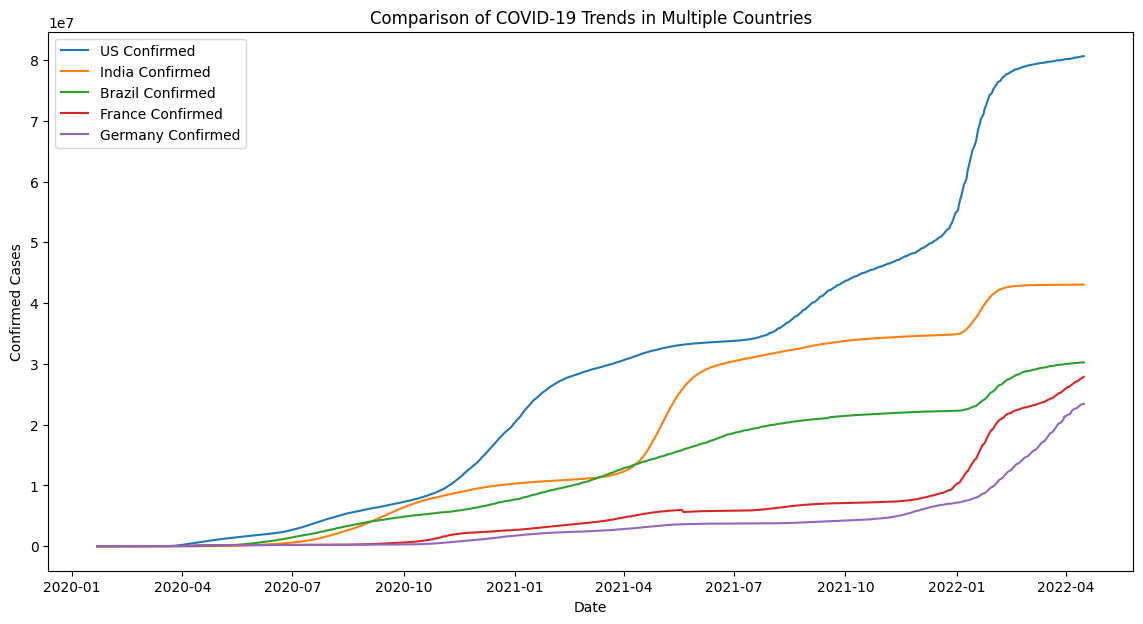

In [33]:
compare_countries(top_5_countries)


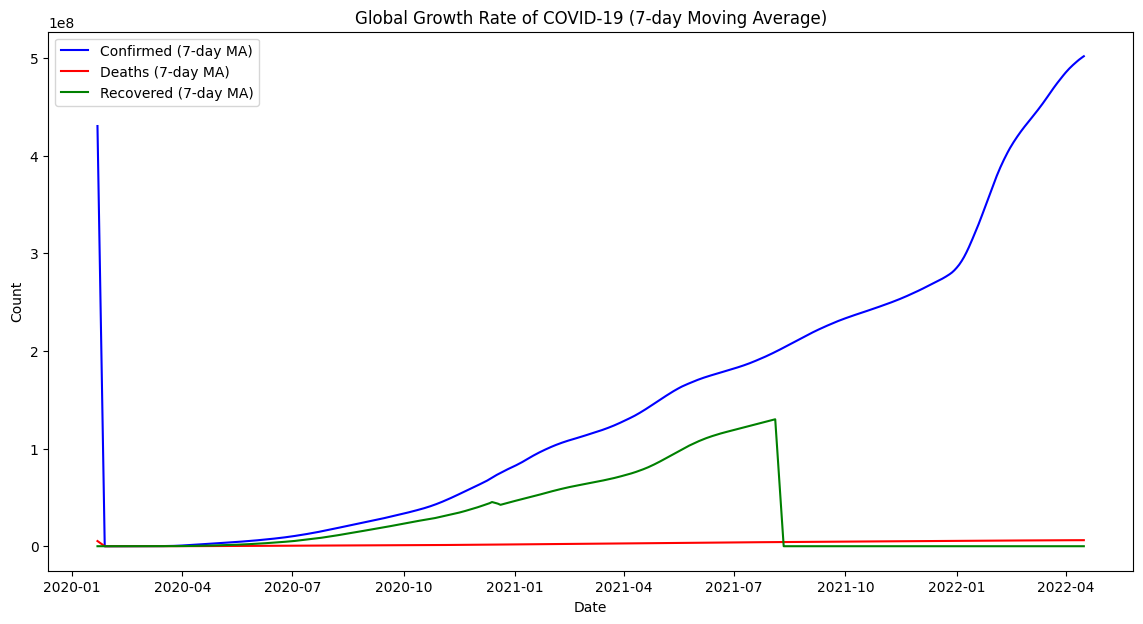

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Confirmed_MA'].sum(), label='Confirmed (7-day MA)', color='blue')
plt.plot(df.groupby('Date')['Deaths_MA'].sum(), label='Deaths (7-day MA)', color='red')
plt.plot(df.groupby('Date')['Recovered_MA'].sum(), label='Recovered (7-day MA)', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Growth Rate of COVID-19 (7-day Moving Average)')
plt.legend()
plt.show()

In [35]:
print("Top 10 Countries by Cumulative Confirmed Cases, Deaths, and Recoveries:")
print(top_countries_data.groupby('Country').max()[['Confirmed', 'Deaths', 'Recovered']])


Top 10 Countries by Cumulative Confirmed Cases, Deaths, and Recoveries:
                Confirmed  Deaths  Recovered
Country                                     
Brazil           30250077  662185   17771228
France           27874269  145159     415111
Germany          23416663  132942    3659260
India            43042097  521751   30974748
Italy            15659835  161602    4144608
Korea, South     16305752   21092     180719
Russia           17801103  365774    5609682
Turkey           14991669   98551    5478185
US               80625120  988609    6298082
United Kingdom   21916961  172014      24693


<ipython-input-36-f07b93c7541c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Recovery_Rate'] = top_countries_data['Recovered'] / top_countries_data['Confirmed']


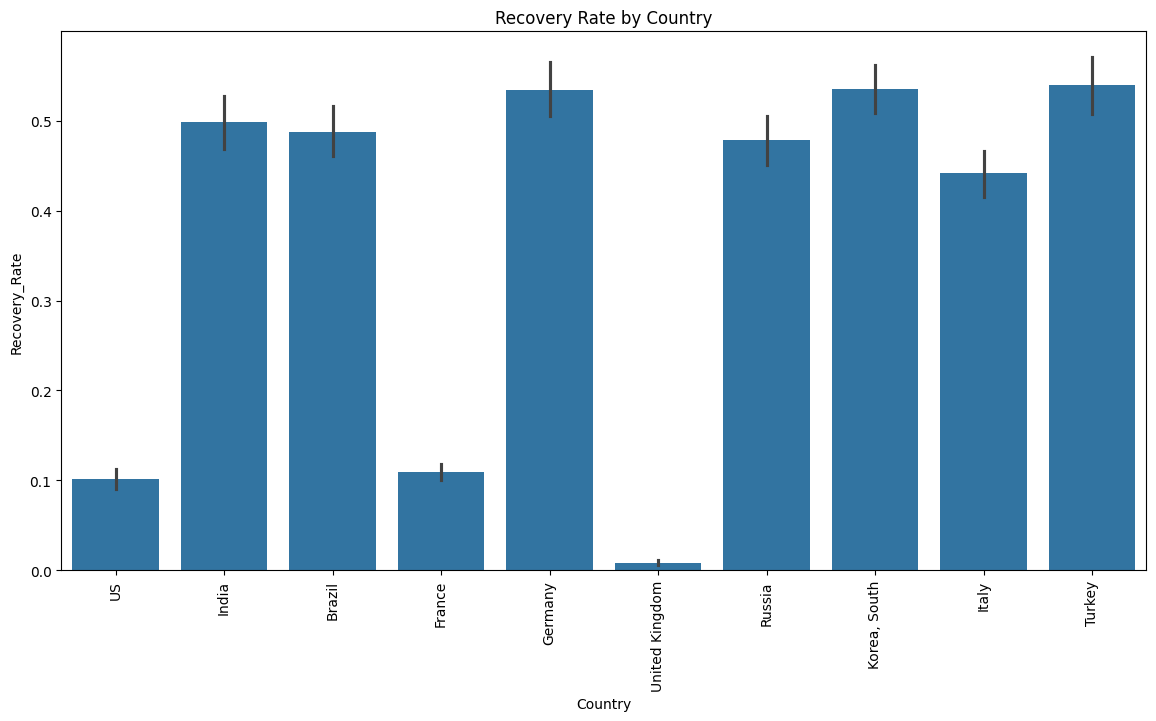

In [36]:
top_countries_data['Recovery_Rate'] = top_countries_data['Recovered'] / top_countries_data['Confirmed']
plt.figure(figsize=(14, 7))
sns.barplot(data=top_countries_data, x='Country', y='Recovery_Rate', order=top_countries)
plt.title('Recovery Rate by Country')
plt.xticks(rotation=90)
plt.show()

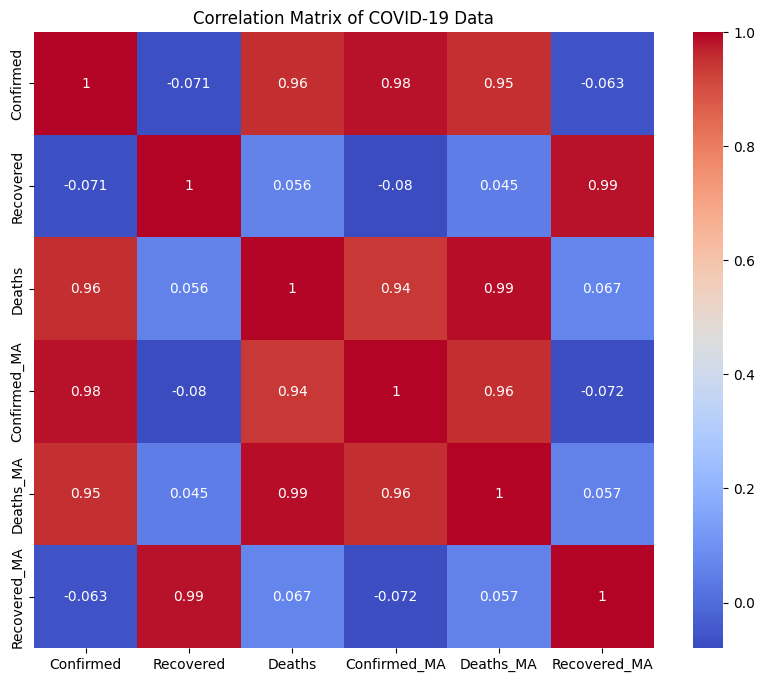

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()

In [38]:
import numpy as np


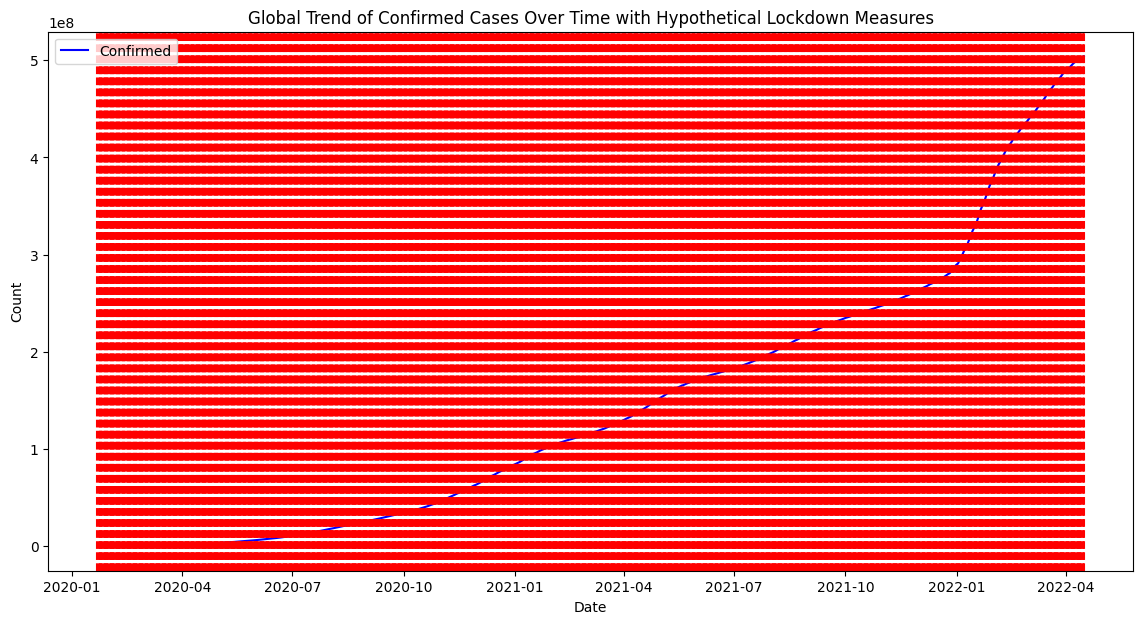

In [39]:
np.random.seed(0)

lockdown_levels = np.random.randint(0, 4, size=len(df))

df['Lockdown_Level'] = lockdown_levels

plt.figure(figsize=(14, 7))
plt.plot(df.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Trend of Confirmed Cases Over Time with Hypothetical Lockdown Measures')
plt.legend()

lockdown_dates = df[df['Lockdown_Level'] > 0]['Date'].unique()
for date in lockdown_dates:
    plt.axvline(x=date, color='red', linestyle='--', label=f"Lockdown Level {df[df['Date'] == date]['Lockdown_Level'].values[0]}")

plt.show()

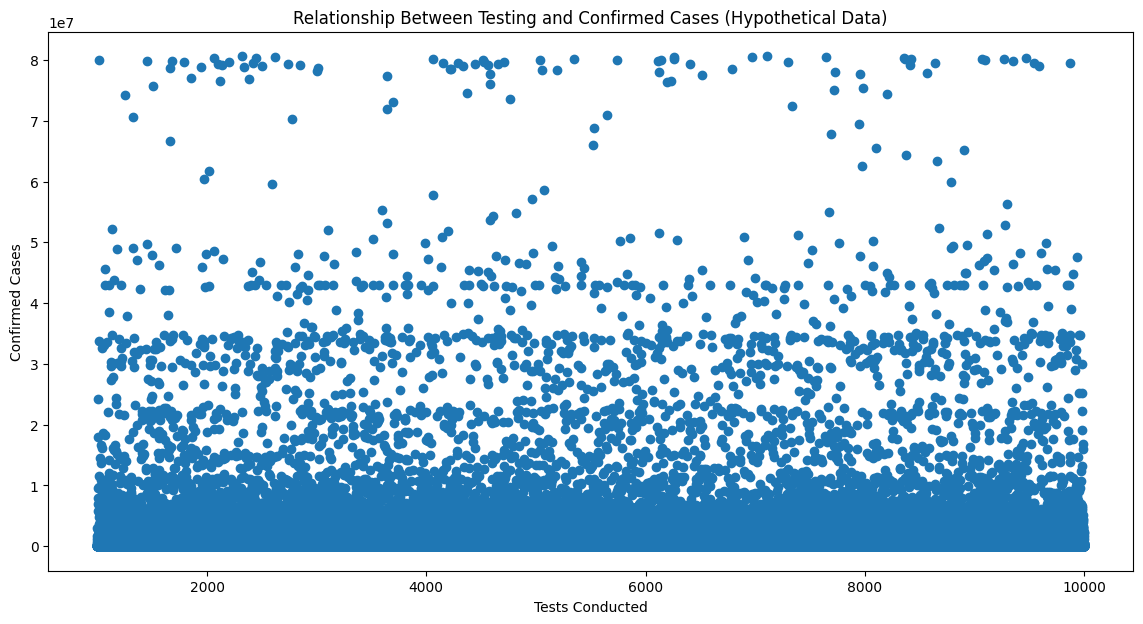

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

countries = df['Country'].unique()
dates = df['Date'].unique()

testing_data = {
    'Country': np.repeat(countries, len(dates)),
    'Date': np.tile(dates, len(countries)),
    'Tests': np.random.randint(1000, 10000, size=len(countries) * len(dates)),
    'Positive_Cases': np.random.randint(10, 500, size=len(countries) * len(dates))
}

testing_df = pd.DataFrame(testing_data)

merged_data = pd.merge(df, testing_df, on=['Country', 'Date'], how='left')

merged_data['Positivity_Rate'] = merged_data['Positive_Cases'] / merged_data['Tests'] * 100

plt.figure(figsize=(14, 7))
plt.scatter(merged_data['Tests'], merged_data['Confirmed'])
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.title('Relationship Between Testing and Confirmed Cases (Hypothetical Data)')
plt.show()


        Date      Country  Confirmed  Recovered  Deaths Continent
0 2020-01-22  Afghanistan          0          0       0      Asia
1 2020-01-23  Afghanistan          0          0       0      Asia
2 2020-01-24  Afghanistan          0          0       0      Asia
3 2020-01-25  Afghanistan          0          0       0      Asia
4 2020-01-26  Afghanistan          0          0       0      Asia
13056


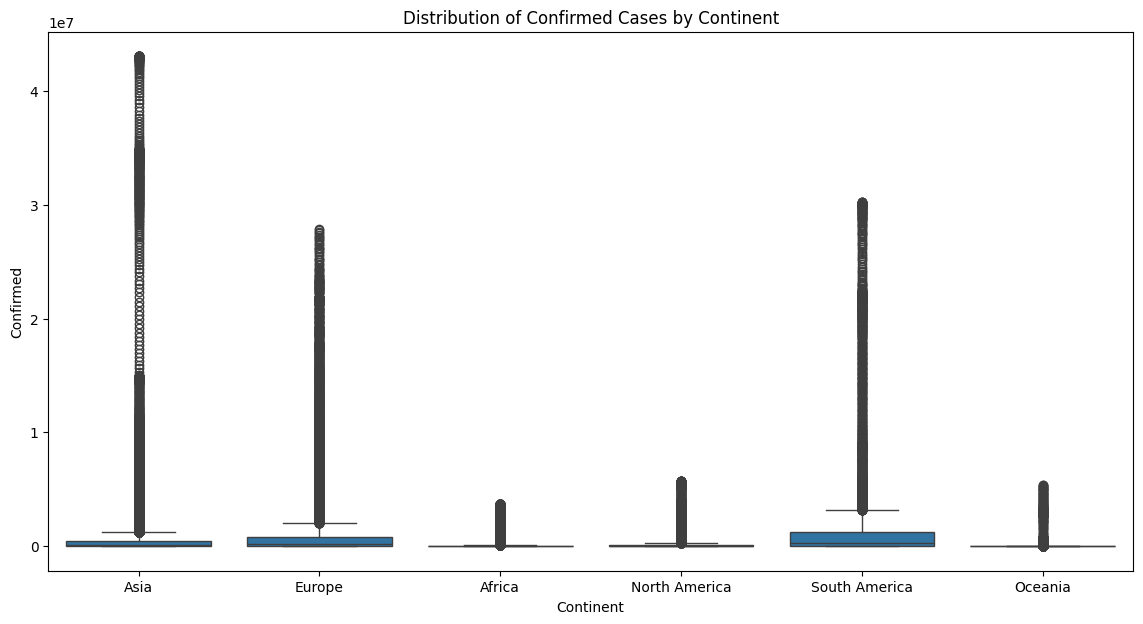

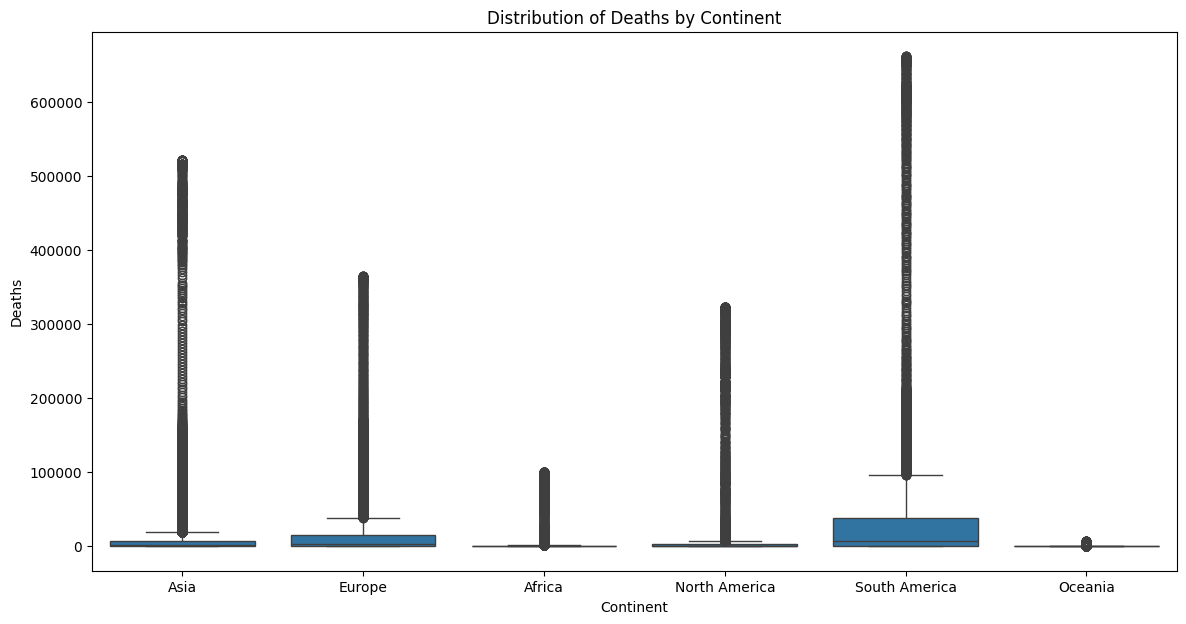

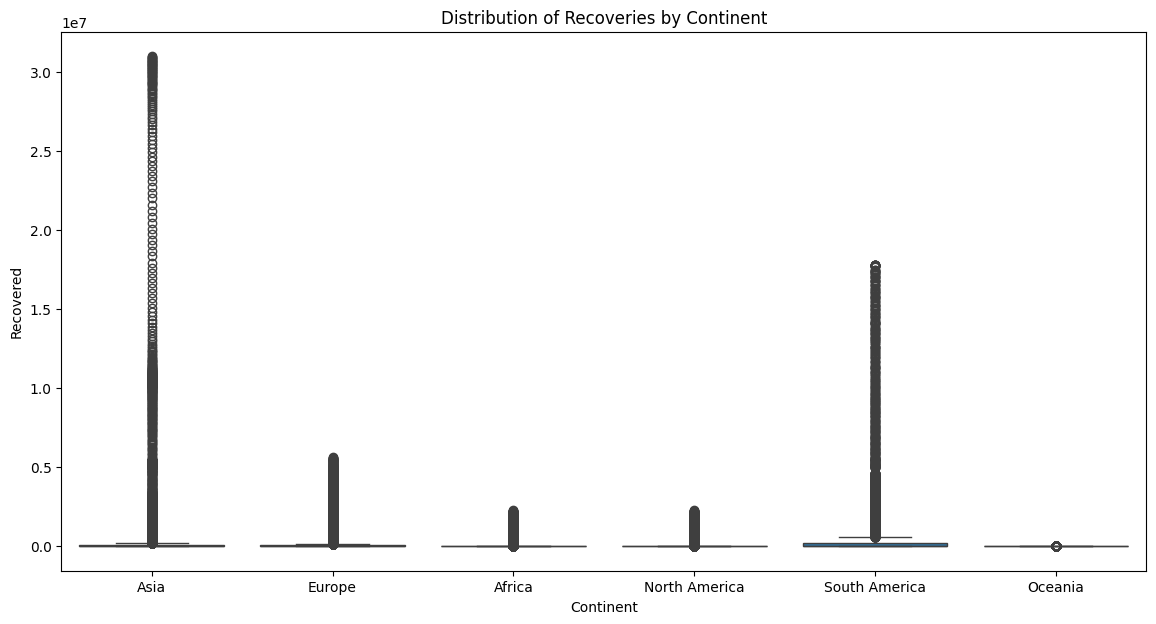

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])

continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Togo', 'Tunisia', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'UAE', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}

df['Continent'] = df['Country'].map(country_to_continent)

print(df.head())

print(df['Continent'].isnull().sum())

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Confirmed')
plt.title('Distribution of Confirmed Cases by Continent')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Deaths')
plt.title('Distribution of Deaths by Continent')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Continent', y='Recovered')
plt.title('Distribution of Recoveries by Continent')
plt.show()


In [46]:
import pandas as pd

country_cases = df.groupby('Country')['Confirmed'].max().reset_index()

country_cases_sorted = country_cases.sort_values(by='Confirmed', ascending=True)

countries_least_cases = country_cases_sorted.head(10)


print("Countries with the least number of confirmed cases:")
print(countries_least_cases[['Country', 'Confirmed']])



Countries with the least number of confirmed cases:
                  Country  Confirmed
117            Micronesia          1
113      Marshall Islands          7
106            MS Zaandam          9
5              Antarctica         11
76               Holy See         29
194  Winter Olympics 2022        535
49       Diamond Princess        712
168  Summer Olympics 2020        865
92               Kiribati       3071
135                 Palau       4190


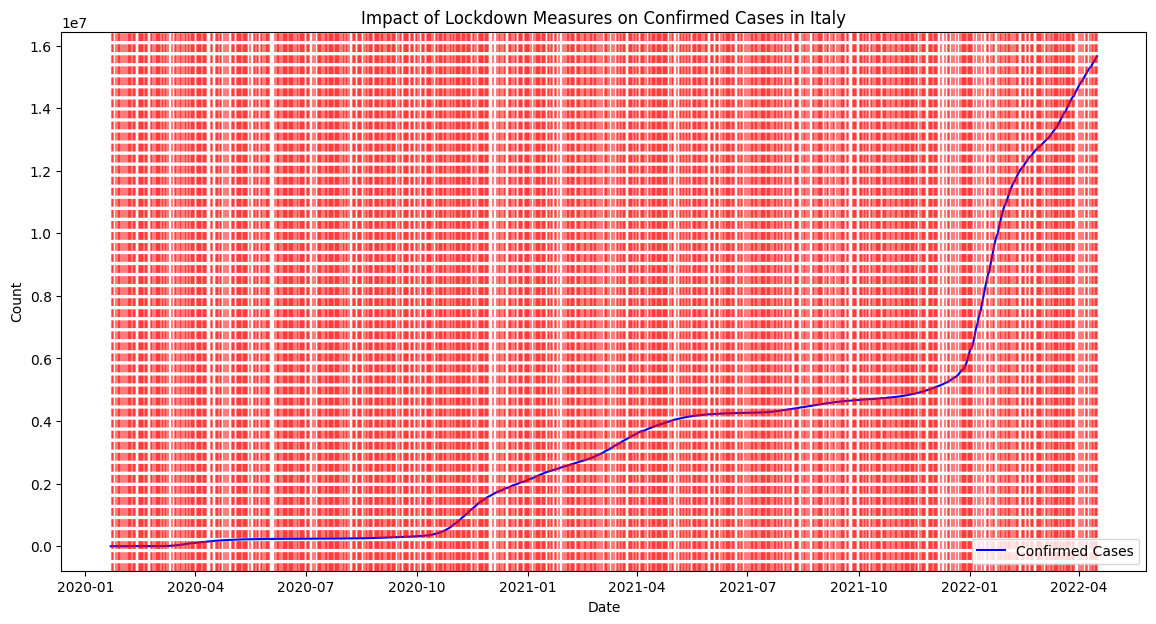

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])

countries = df['Country'].unique()
dates = df['Date'].unique()

lockdown_data = {
    'Country': np.repeat(countries, len(dates)),
    'Date': np.tile(dates, len(countries)),
    'Lockdown_Level': np.random.randint(0, 4, size=len(countries) * len(dates))
}

lockdown_df = pd.DataFrame(lockdown_data)

merged_data = pd.merge(df, lockdown_df, on=['Country', 'Date'], how='left')

def plot_lockdown_impact(country):
    country_data = merged_data[merged_data['Country'] == country]
    plt.figure(figsize=(14, 7))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Impact of Lockdown Measures on Confirmed Cases in {country}')
    plt.legend()

    lockdown_dates = country_data[country_data['Lockdown_Level'] > 0]['Date'].unique()
    for date in lockdown_dates:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)

    plt.show()

plot_lockdown_impact('Italy')



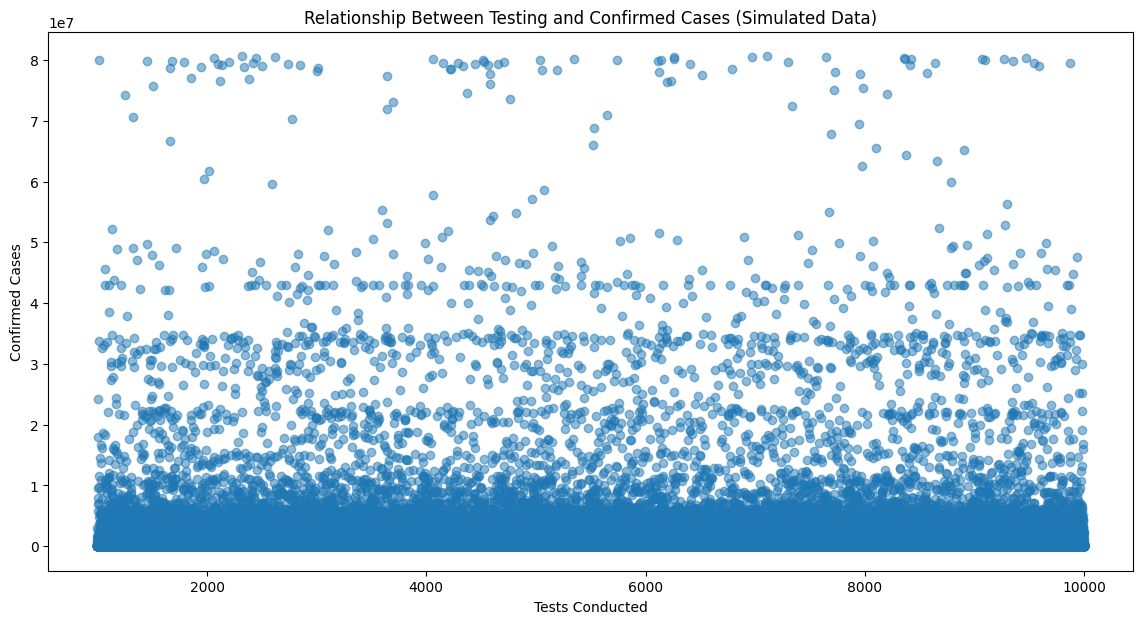

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])

countries = df['Country'].unique()
dates = df['Date'].unique()

testing_data = {
    'Country': np.repeat(countries, len(dates)),
    'Date': np.tile(dates, len(countries)),
    'Tests': np.random.randint(1000, 10000, size=len(countries) * len(dates)),
    'Positive_Cases': np.random.randint(10, 500, size=len(countries) * len(dates))
}

testing_df = pd.DataFrame(testing_data)

merged_data = pd.merge(df, testing_df, on=['Country', 'Date'], how='left')

merged_data['Positivity_Rate'] = merged_data['Positive_Cases'] / merged_data['Tests'] * 100

plt.figure(figsize=(14, 7))
plt.scatter(merged_data['Tests'], merged_data['Confirmed'], alpha=0.5)
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.title('Relationship Between Testing and Confirmed Cases (Simulated Data)')
plt.show()
